In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate = 0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            
            dw = (1/n_samples) * np.dot(X.T, y_pred - y)
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

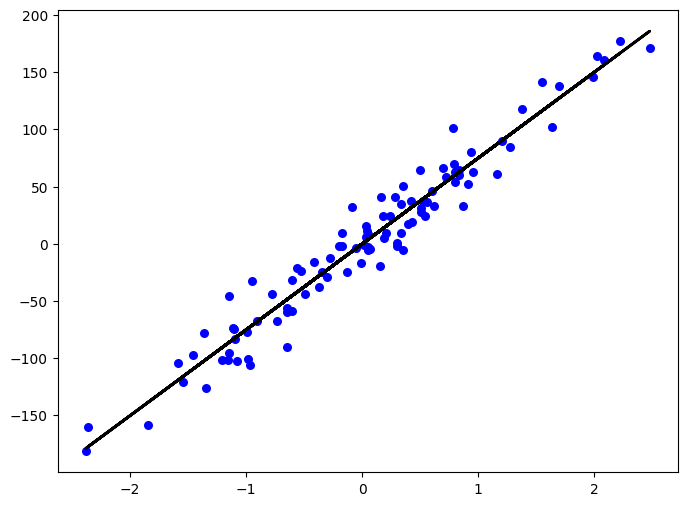

In [3]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = 'b', marker='o', s=30)

reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

y_pred_line = reg.predict(X)

plt.plot(X, y_pred_line, color='black', linewidth=2, label='Predictions')
plt.show()
